In [1]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [2]:
coinsPenny = coins[coins['Denom'] == 'Penny']
coinsPenny = coinsPenny[['Year', 'Mint_State', 'Value']]

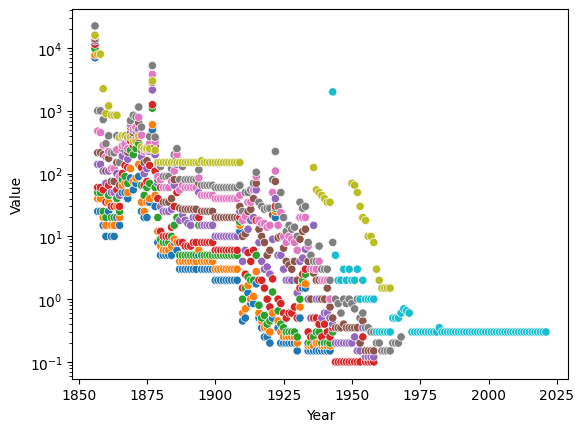

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsPenny, hue='Mint_State', legend=False)
plt.yscale('log')

In [5]:
import pandas as pd

df = pd.DataFrame(coinsPenny)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
      Year   Mint_State    Value
722   1856         Good   7000.0
723   1856        VGood   7750.0
724   1856         Fine   9750.0
725   1856        VFine  11500.0
726   1856        EFine  13000.0
...    ...          ...      ...
1189  1907        Proof    150.0
1198  1908        Proof    150.0
1207  1909        Proof    150.0
1311  1922  MintState63    225.0
1484  1943  MintState65   2000.0

[150 rows x 3 columns]


In [6]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([ 722,  723,  724,  725,  726,  727,  728,  729,  730,  736,  737,
        738,  739,  745,  746,  747,  748,  754,  755,  756,  757,  764,
        765,  766,  772,  773,  774,  775,  783,  784,  792,  793,  799,
        800,  801,  802,  810,  811,  816,  817,  818,  819,  820,  825,
        826,  827,  828,  829,  834,  835,  836,  837,  838,  841,  842,
        843,  844,  845,  846,  847,  850,  851,  852,  853,  854,  855,
        856,  859,  860,  861,  862,  863,  864,  865,  868,  869,  870,
        871,  872,  873,  874,  879,  880,  881,  882,  883,  889,  890,
        891,  892,  898,  899,  900,  901,  906,  907,  908,  909,  910,
        911,  912,  913,  914,  915,  916,  917,  918,  919,  924,  925,
        926,  927,  928,  937,  946,  955,  964,  973,  982,  990,  991,
        997,  998,  999, 1000, 1009, 1018, 1027, 1036, 1045, 1054, 1063,
       1072, 1081, 1090, 1099, 1108, 1117, 1126, 1135, 1144, 1153, 1162,
       1171, 1180, 1189, 1198, 1207, 1311, 1484])

In [7]:
for i in indicies:
  coinsPenny = coinsPenny.drop(i)

In [8]:
coinsPenny

,Year,Mint_State,Value
731,1857,Good,25.0
732,1857,VGood,40.0
733,1857,Fine,50.0
734,1857,VFine,60.0
735,1857,EFine,140.0
...,...,...,...
1643,2017,MintState65,0.3
1644,2018,MintState65,0.3
1645,2019,MintState65,0.3
1646,2020,MintState65,0.3


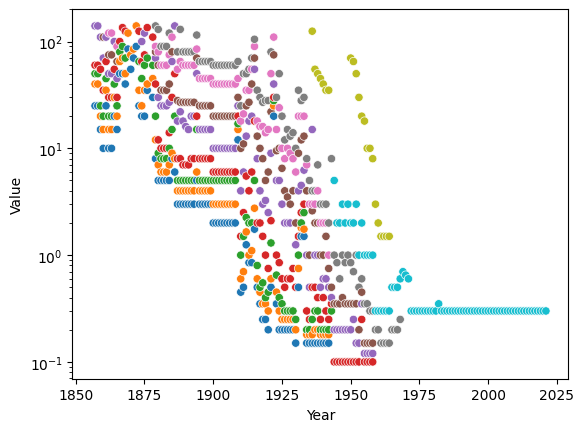

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsPenny, hue='Mint_State', legend=False)
plt.yscale('log')

In [10]:
from sklearn.preprocessing import LabelEncoder
lencMS = LabelEncoder()
coinsPenny["Mint_State"] = lencMS.fit_transform(coinsPenny["Mint_State"])
coinsPenny["Mint_State"]

731     3
732     9
733     2
734     8
735     1
       ..
1643    6
1644    6
1645    6
1646    6
1647    6
Name: Mint_State, Length: 776, dtype: int64

In [11]:
coinsPenny['log_Value'] = np.log(coinsPenny['Value'])

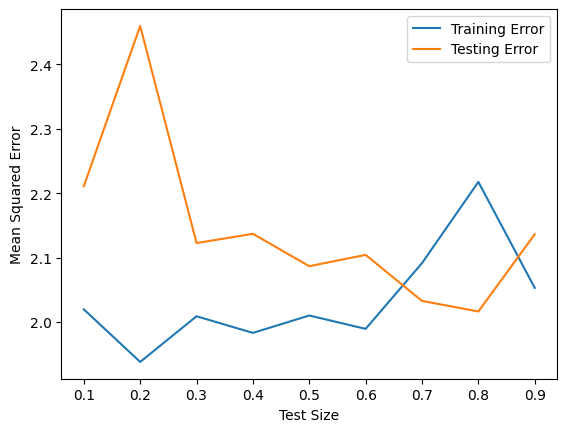

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsPenny.iloc[:,0:2]
y = coinsPenny.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X = coinsPenny.iloc[:,0:2]
Y = coinsPenny.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.5, random_state=0)

In [14]:
X

,Year,Mint_State
731,1857,3
732,1857,9
733,1857,2
734,1857,8
735,1857,1
...,...,...
1643,2017,6
1644,2018,6
1645,2019,6
1646,2020,6


In [15]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [16]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [17]:
mseModel1

374.51939072244284

In [18]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.04543622 -0.01061812]
Intercept: 88.73609455196214


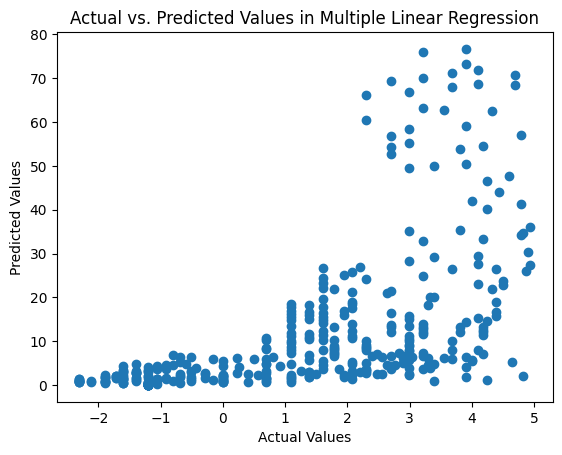

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

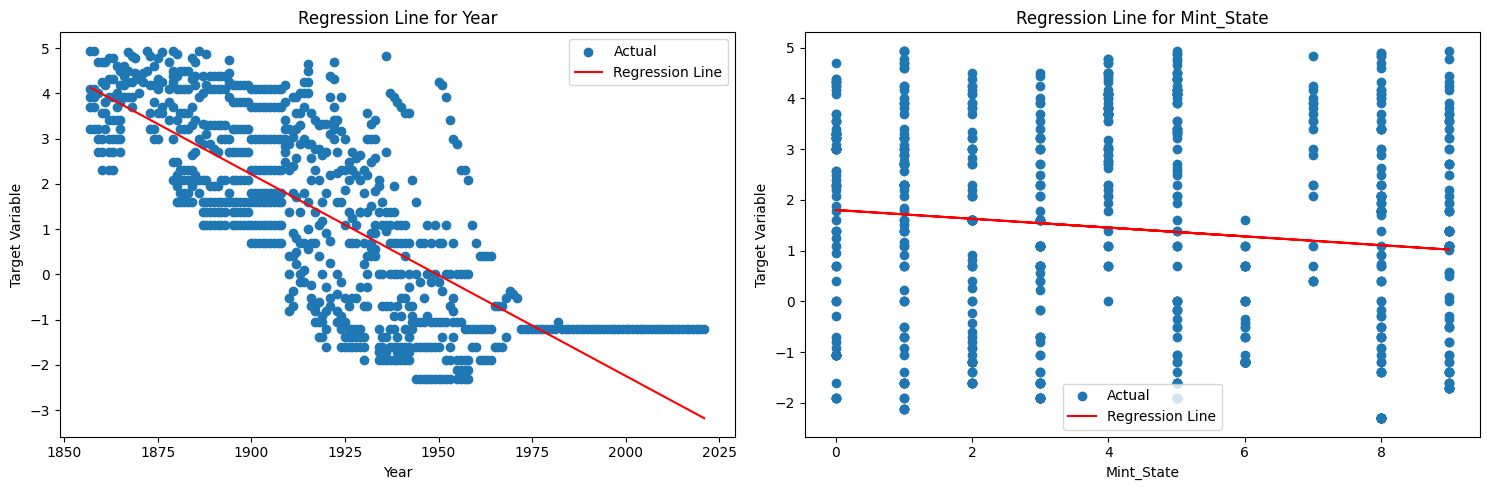

In [20]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
coinsPenny[coinsPenny['Mint_State'] == 7]

,Denom,Year,Value,log_Value
8890,7,1866,25000.0,10.126631
8896,7,1867,25000.0,10.126631
8902,7,1868,25000.0,10.126631
8908,7,1869,25000.0,10.126631
8914,7,1870,25000.0,10.126631
8920,7,1871,25000.0,10.126631
8926,7,1872,22500.0,10.021271
8932,7,1873,22500.0,10.021271
8938,7,1874,27500.0,10.221941
8949,7,1876,20000.0,9.903488


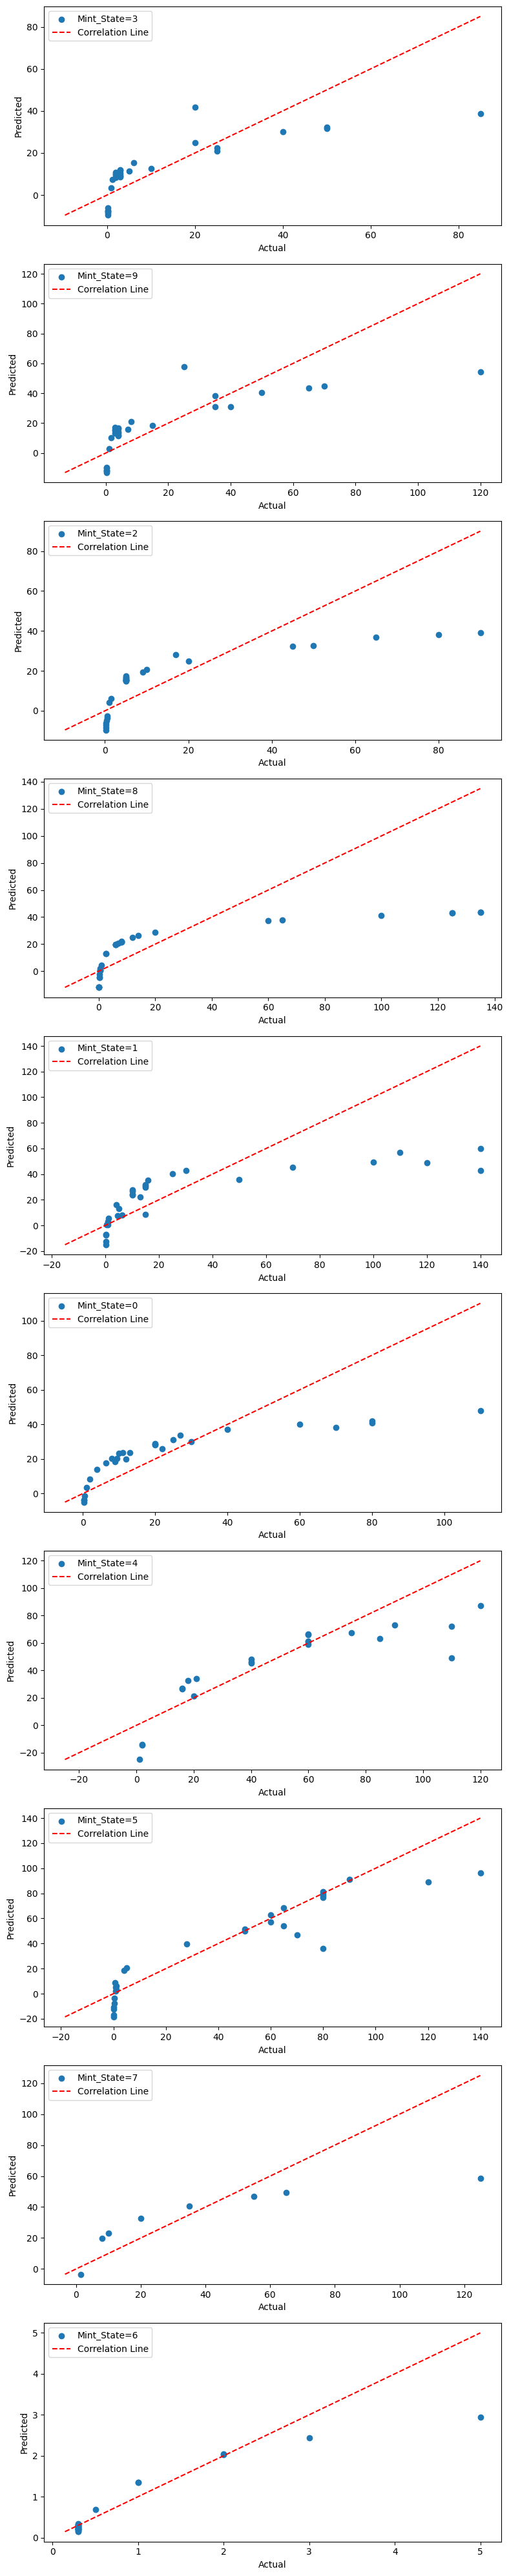

In [22]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsPenny.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsPenny['Value']  # Specify the column name of your target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsPenny[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsPenny[coinsPenny[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

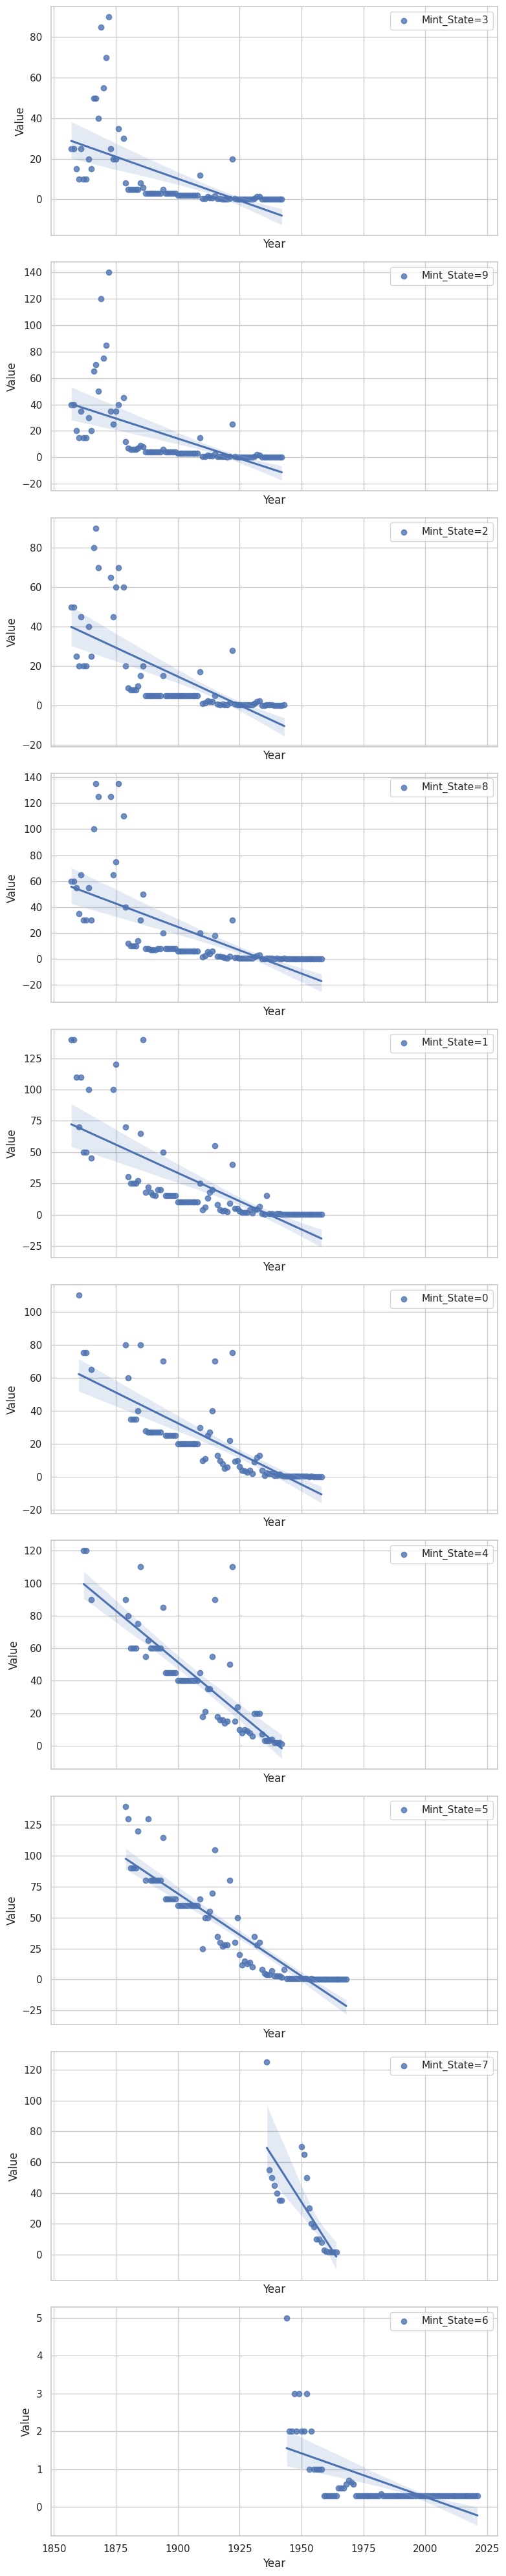

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsPenny[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsPenny[coinsPenny[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.588884  -0.901476
Mint_State       NaN         NaN       NaN        NaN
Value      -0.588884         NaN  1.000000   0.746818
log_Value  -0.901476         NaN  0.746818   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.587859  -0.906275
Mint_State       NaN         NaN       NaN        NaN
Value      -0.587859         NaN  1.000000   0.736699
log_Value  -0.906275         NaN  0.736699   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.687486  -0.904255
Mint_State       NaN         NaN       NaN        NaN
Value      -0.687486         NaN  1.000000   0.779239
log_Value  -0.904255         NaN  0.779239   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.655622  -0.939742
Mint_State       NaN         NaN       NaN        NaN
Value      -0.655622        

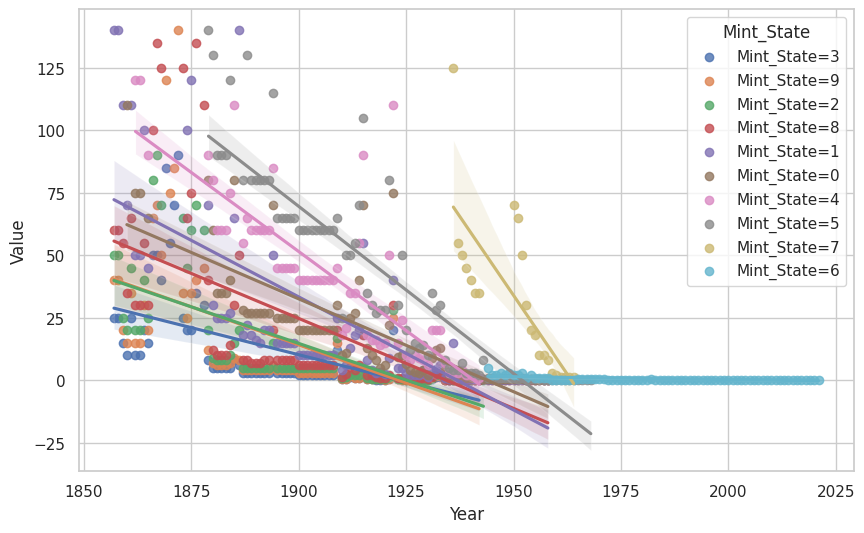

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsPenny[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsPenny[coinsPenny[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [26]:
overall_correlation_matrix = coinsPenny.corr()
overall_correlation_matrix

,Year,Mint_State,Value,log_Value
Year,1.000000,0.104408,-0.532275,-0.734115
Mint_State,0.104408,1.000000,-0.044281,-0.121315
Value,-0.532275,-0.044281,1.000000,0.774663
log_Value,-0.734115,-0.121315,0.774663,1.000000


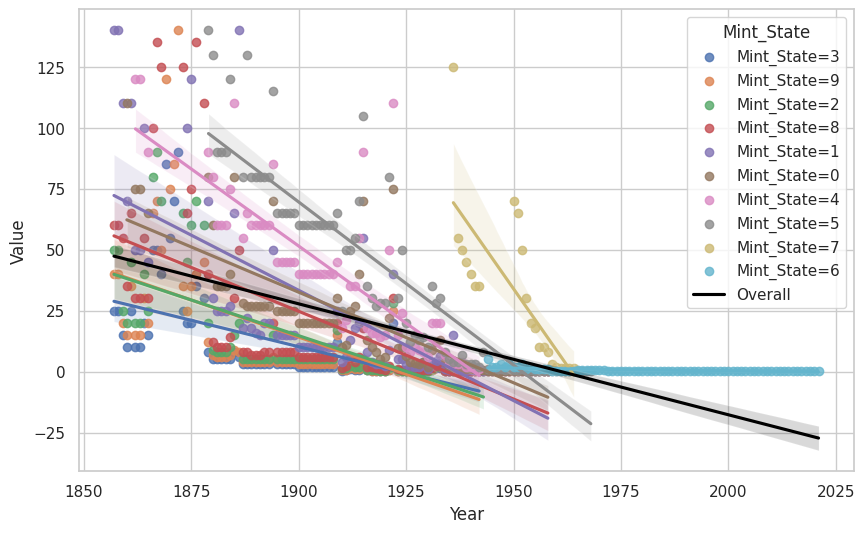

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsPenny[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsPenny[coinsPenny[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsPenny[attribute_column], y=coinsPenny[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

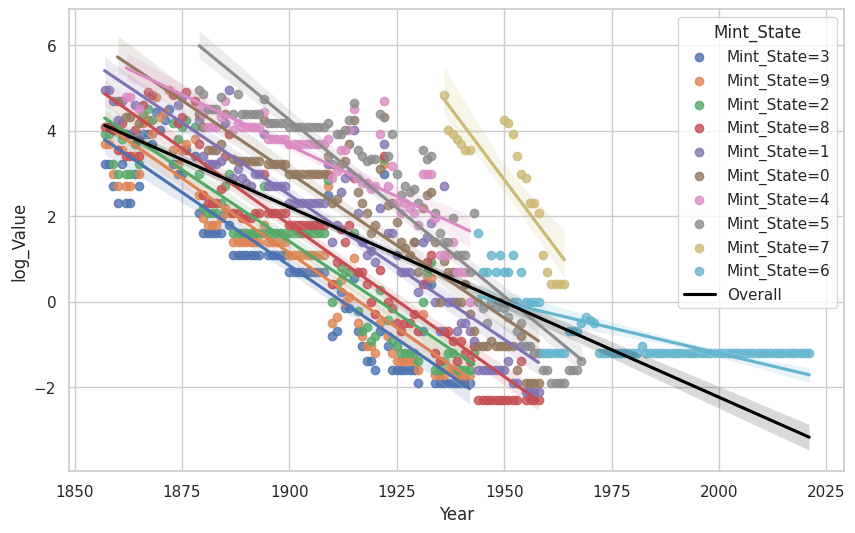

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'log_Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsPenny[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsPenny[coinsPenny[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsPenny[attribute_column], y=coinsPenny[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()